<a href="https://colab.research.google.com/github/SilverCobra-prog/sstp_health_cov_models/blob/main/random_forest_loneliness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data Processing
import pandas as pd
import numpy as np
import ssl

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Importing the dataset
df = pd.read_csv('human_annotations_same.csv')
df = df.dropna(how='any')
df = df.drop(['id', 'full_link', 'human_label2'], axis=1)
df.head()

,text,human_label1
0,Just wanna talkIm here to talk if you want,0.0
1,"Were all lonely people, right?Saw a post on he...",0.0
2,i hate my birthdaymy birthday is in two days a...,1.0
3,I've made it back to feeling numb[removed],0.0
4,No escape no way to get away for awhileNo esca...,1.0


In [3]:
# Cleaning the texts
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

corpus = []
for i in range(0,6726):
    post = re.sub('[^a-zA-Z]',' ',df['text'][i])
    post = post.lower()
    post = post.split() #convert into list
    ps = PorterStemmer()
    post = [ps.stem(word) for word in post if not word in set(stopwords.words('english'))]
    #for word in post:
      #word1 = word
      #if word == 'lone' and word1 != 'not':
        #df['human_label1'][i] = 1
    post = ' '.join(post)
    corpus.append(post)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Creating the bag of Word Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features = 100)
X=cv.fit_transform(corpus).toarray()
y=df["human_label1"]

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', bootstrap=False, n_estimators=500, min_samples_split=5, max_depth=400, min_samples_leaf=2)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       893
         1.0       0.66      0.75      0.71       453

    accuracy                           0.79      1346
   macro avg       0.77      0.78      0.77      1346
weighted avg       0.80      0.79      0.79      1346



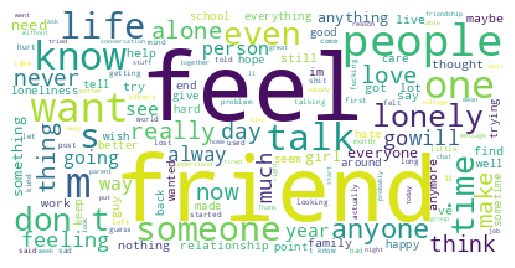

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(words for words in df['text'])
wc = WordCloud(stopwords = STOPWORDS,
               background_color = "white",
               max_words = 100,
               max_font_size = 500,
               random_state = 42)
wc.generate(text)
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()

In [26]:
# Predicting the Test set results
#criterion='entropy', bootstrap=False, n_estimators=500, min_samples_split=5, max_depth=400, min_samples_leaf=2
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84       893
         1.0       0.67      0.75      0.71       453

    accuracy                           0.79      1346
   macro avg       0.77      0.78      0.77      1346
weighted avg       0.80      0.79      0.79      1346



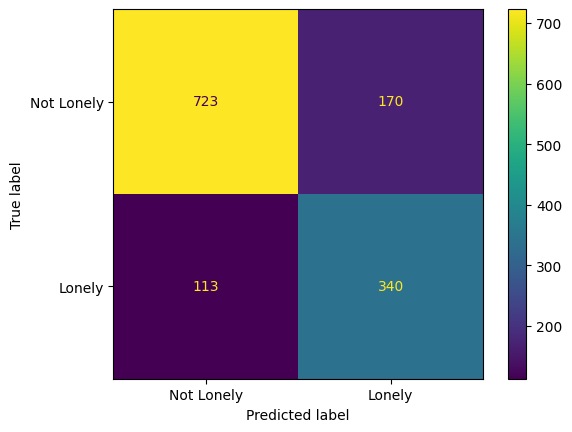

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Not Lonely", "Lonely"])

cm_display.plot()
plt.show()